In [1]:
import lichess.api
from lichess.format import PYCHESS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
user = lichess.api.user('GarethC13')
print(user['perfs']['bullet']['rating'])

1777


In [3]:
games = lichess.api.user_games('GarethC13', max=3000, perfType='bullet')
gameslist = list(games)

In [4]:
whitegames = []
blackgames = []
for game in gameslist:
    players = game['players']
    colour = players.get('white')
    user = colour.get('user')
    i_d = user.get('id')
    if i_d == 'garethc13':
        whitegames.append(game)
    else:
        blackgames.append(game)
print(len(gameslist),'total bullet games.')
print(len(whitegames),'as white.')
print(len(blackgames),'as black.')

3000 total bullet games.
1504 as white.
1496 as black.


[1, 2, 52, 5, 8, 49, 20, 370, 50, 806, 3, 17, 42, 4, 2, 1, 52, 0, 0, 0]


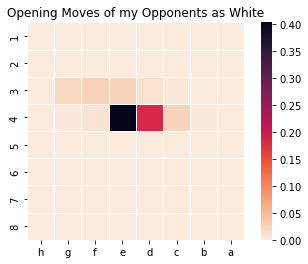

1484

In [5]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
values = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]

uniform_data = np.zeros([8,8])
for i in blackgames:
    j = i['moves'].split()
    for m,v,s in zip(move,range(20),squares):
        if j[0] == m:
            values[v] += 1
            
print(values)

for v,s in zip(values,squares):
    s0 = s[0]
    s1 = s[1]
    uniform_data[s0,s1] = v

cmap = sns.cm.rocket_r
for v,s in zip(values,squares):
    s0 = s[0]
    s1 = s[1]
    uniform_data[s0,s1] = v

data_avg = uniform_data/2000    

x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [1,2,3,4,5,6,7,8]

ax = sns.heatmap(data_avg,square=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                 cmap=cmap,linewidth=0.5)
plt.title('Opening Moves of my Opponents as White')
plt.savefig('openings.png')
plt.show()
sum(values)

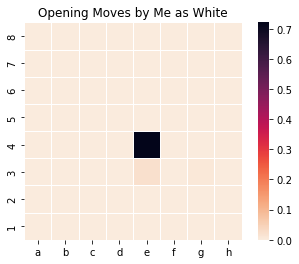

[0, 0, 0, 0, 0, 0, 1, 0, 45, 1442, 0, 1, 15, 0, 0, 0, 0, 0, 0, 0]


In [6]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
values = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]

uniform_data = np.zeros([8,8])
for i in whitegames:
    j = i['moves'].split()
    for m,v,s in zip(move,range(20),squares):
        if j[0] == m:
            values[v] += 1
for v,s in zip(values,squares):
    s0 = s[0]
    s1 = s[1]
    uniform_data[s0,s1] = v
cmap = sns.cm.rocket_r

data_avg = uniform_data/2000    
    
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [1,2,3,4,5,6,7,8]

ax = sns.heatmap(data_avg,square=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                 cmap=cmap,linewidth=0.5)
plt.title('Opening Moves by Me as White')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()
print(values)

In [40]:
letters = ['a','b','c','d','e','f','g','h']
move = []
values = [0]*64
squares = []
v = 0
for i in letters:
    for j in range(1,9,1):
        k = i+str(j)
        move.append(k)

x = 7
while x >= 0:
    for f in range(0,8):
        for i in range(0,8):
            j = [i,x]
            squares.append(j)
        x-=1

        
for x in blackgames:
    if x['status'] == 'mate' and x['winner'] == 'white':
        y = x['moves']
        y = list(y.split(' '))
        y = y[1::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g8'
            elif i == 'O-O-O':
                king = 'c8'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[39] += 1
            
data = np.zeros([8,8])
for v,s in zip(values,squares):
    s0 = s[0]
    s1 = s[1]
    data[s0,s1] = v

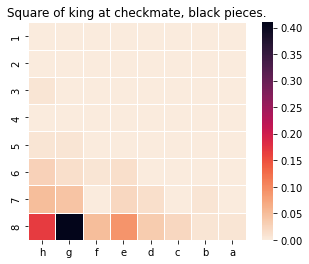

In [41]:
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [1,2,3,4,5,6,7,8]
data = data/(sum(sum(data)))
ax = sns.heatmap(data,square=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                 cmap=cmap,linewidth=0.5)
plt.title('Square of king at checkmate, black pieces.')
plt.savefig('blackmate.png')
plt.show()

In [44]:
letters = ['a','b','c','d','e','f','g','h']
move = []
values = [0]*64
squares = []
v = 0
for i in letters:
    for j in range(1,9,1):
        k = i+str(j)
        move.append(k)

x = 7
while x >= 0:
    for f in range(0,8):
        for i in range(0,8):
            j = [i,x]
            squares.append(j)
        x-=1

        
for x in whitegames:
    if x['status'] == 'mate' and x['winner'] == 'black':
        y = x['moves']
        y = list(y.split(' '))
        y = y[0::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g1'
            elif i == 'O-O-O':
                king = 'c1'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[32] += 1
            
data = np.zeros([8,8])
for v,s in zip(values,squares):
    s0 = s[0]
    s1 = s[1]
    data[s0,s1] = v

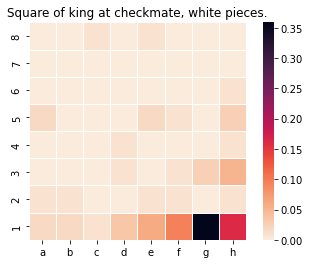

In [46]:
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [1,2,3,4,5,6,7,8]
data = data/(sum(sum(data)))
ax = sns.heatmap(data,square=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                 cmap=cmap,linewidth=0.5)
plt.title('Square of king at checkmate, white pieces.')
ax.invert_xaxis()
ax.invert_yaxis()
plt.savefig('whitemate.png')
plt.show()